<center><h3>Projeto SkillUp | Data and Analytics Upskilling<h3></center>

# Organização e entregáveis

### Stoytelling dos dados de chamados da Prefeitura de Curitiba - Jul/Ago/Set/Out/Nov de 2023

### Entregáveis

1 - Número de chamados por mês (têndencias aprensentadas mês a mês) ✅<br>
2 - Número de chamados por região (constância/variância de chamados gerados pelas regiões, mês a mês) ✅<br>
3 - Análise de correlação entre os tipos de chamados abertos e o horário do dia (manhã/tarde/noite) ✅<br>
4 - Análise do sexo das pessoas que abrem os chamados<br>
5 - Análise de qual secretaria foi direcionado o ticket para ação e (coluna S)<br>
6 - Análise do tipo de chamado aberto (solicitação, reclamação e elogio - coluna B)<br>
7 - Análise da idade/faixa etária das pessoas que abriram os tickets (idade média)<br>
8 - Concentração de volume de tickets por bairro da cidade (jointplot) - * talvez usar power bi ou API para plotar mapa - bairros x localização<br>

### Relatório

- Descrição das variáveis

### Limpeza da base

1 - Coluna BAIRRO_CIDADAO não normalizada - correção da base para melhor análise - corrigir nomes totalmente em maíusculas




In [25]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Read datasets from Datasets folder

# Reading all datasets
df1 = pd.read_excel('Datasets/Nov 2023 - 156 - Base de Dados.xlsx')
df2 = pd.read_excel('Datasets/Oct 2023 - 156 - Base de Dados.xlsx')
df3 = pd.read_excel('Datasets/Set 2023 - 156 - Base de Dados.xlsx')
df4 = pd.read_excel('Datasets/Ago 2023 - 156 - Base de Dados.xlsx')
df5 = pd.read_excel('Datasets/Jul 2023 - 156 - Base de Dados.xlsx')

# Elimitate the first row of the datasets 
df1 = df1.drop([0])
df2 = df2.drop([0])
df3 = df3.drop([0])
df4 = df4.drop([0])
df5 = df5.drop([0])

# Contatenate the datasets
df = pd.concat([df1, df2, df3, df4, df5])

# Drop all the Unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
1,10348816,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:32,Fauna sinantrópica,Morcegos,Solicita orientações em relação a morcegos. Ci...,"Rua Serafim Lucca, 437",SAO BRAZ,Unidade Regional Santa Felicidade,EMAIL,NaN,M,São Braz,Unidade Regional Santa Felicidade,1972-02-25 00:00:00,CIDADÃO,SECRETARIA MUNICIPAL DA SAÚDE,Conclusão - Automática
2,10348817,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:06:56,Poluição,Atmosférica,SOLICITA FISCALIZAÇÃO QUANTO À POLUIÇÃO ATMOSF...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,Unidade Regional Boa Vista,EMAIL,"No endereço, ao lado do ponto de referência.",M,Santa Cândida,Boa Vista,1973-01-10 00:00:00,CIDADÃO,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,Pesquisa realizada
3,10348819,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:14:49,Fiscalização do comércio estabelecido,Comércio diurno,SOLICITA FISCALIZAÇÃO DE COMÉRCIO ESTABELECIDO...,"RUA FERNANDO DE NORONHA, 456",SANTA CANDIDA,Unidade Regional Boa Vista,EMAIL,NO ENDEREÇO E AO LADO DO PONTO DE REFERÊNCIA.,M,Santa Cândida,Boa Vista,1973-01-10 00:00:00,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Pesquisa realizada
4,10348828,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:42:59,Corrida de rua,Informações sobre corrida - adulto,Reclama quanto a falta de sinalização nas ruas...,"AVENIDA ÁGUA VERDE, 56",AGUA VERDE,Unidade Regional Portao,EMAIL,NaN,F,JARDIM SOCIAL,Matriz,1994-07-16 00:00:00,CIDADÃO,"SECRETARIA MUNICIPAL DO ESPORTE, LAZER E JUVEN...",Conclusão - Resposta Aceita
5,10348827,Solicitação,INSTITUTO DAS CIDADES INTELIGENTES,2023-10-01 00:00:00,07:40:33,Passeio,Autorização para protetor de passeio,SOLICITA ESCLARECIMENTOS SOBRE O EVENTO THE HA...,"PARQUE AFONSO BOTELHO, 0",AGUA VERDE,Unidade Regional Portao,EMAIL,NaN,M,REBOUCAS,Matriz,1984-01-12 00:00:00,CIDADÃO,SECRETARIA MUNICIPAL DO URBANISMO,Conclusão - Automática


### 1 - Número de ocorrências por mês (têndencias aprensentadas mês a mês)

In [27]:
# Convert the DATA column to datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Extract the month from the DATA column
df['MONTH'] = df['DATA'].dt.month

# Group by month and sum the SOLICITAO column
count_solicitations_by_month = df.groupby('MONTH')['SOLICITACAO'].count()

print(count_solicitations_by_month)



MONTH
6     32209
7     33456
8     36955
9     34473
10    36624
11       22
Name: SOLICITACAO, dtype: int64


### 2 - Número de chamados por região (constância/variância de chamados gerados pelas regiões, mês a mês)<br>

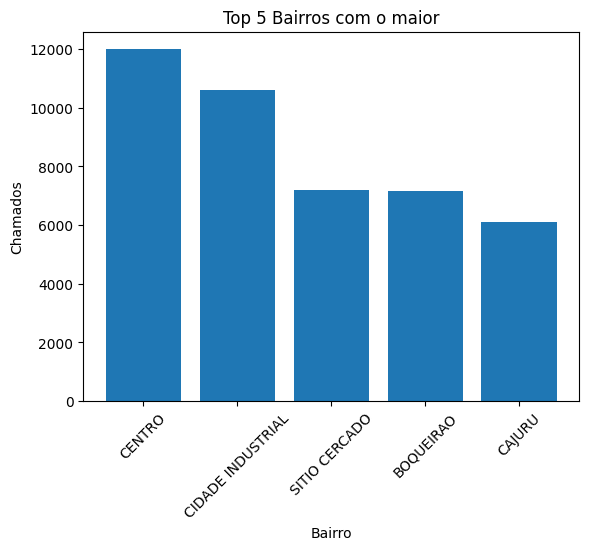

In [30]:
# Número de ligações por bairro

# groupby() -> Agrupa os dados
# count() -> Conta os valores
# to_frame() -> Transforma a Series em DataFrame
# sort_values() -> Ordena os valores

count_bairro = df.groupby('BAIRRO_ASS')['SOLICITACAO'].count().to_frame().sort_values(by='SOLICITACAO', ascending=False)
count_bairro

# Gráfico com os top 5 bairros com maior índice de solicitações

# Top 5
top_5_neighborhoods = count_bairro.head(5)

# Gráfico
plt.bar(top_5_neighborhoods.index, top_5_neighborhoods['SOLICITACAO'])
plt.xlabel('Bairro')
plt.ylabel('Chamados')
plt.title('Top 5 Bairros com o maior')
plt.xticks(rotation=45)
plt.show()





### 3 - Análise de correlação entre os tipos de chamados abertos e o horário do dia (manhã/tarde/noite)<br>

             SOLICITACAO
PERIODO_DIA             
Tarde              69655
Manha              62941
Noite              41143


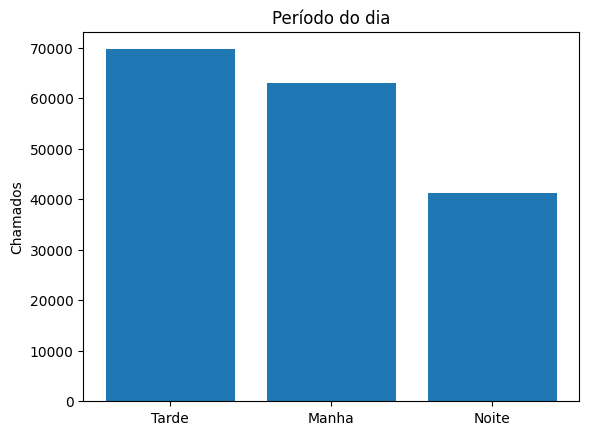

In [36]:
# Funcao para obter o periodo do dia com base no horario
def get_periodo(row):
    horario = row['HORARIO'].hour
    if horario < 12:
        return 'Manha'
    elif horario < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Cria coluna no main DataFrame com o periodo do dia
df['PERIODO_DIA'] = df.apply(get_periodo, axis=1)

# Novo DataFrame agrupando com base no periodo do dia
count_periodo = df.groupby('PERIODO_DIA')['SOLICITACAO'].count().to_frame().sort_values(by='SOLICITACAO', ascending=False)

print(count_periodo)

# Gráfico
plt.bar(count_periodo.index, count_periodo['SOLICITACAO'])
# plt.xlabel('Periodo do dia')
plt.ylabel('Chamados')
plt.title('Período do dia')
plt.show()

